# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
import cv2

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

I'm working with CPU

# 2. Remove dodgy images

I'm sure taht this dataset is clear and not necessary to detect dodgy images, but it's standard practice if I use random pictures from web cause my Keras model works with 'jpeg','jpg', 'bmp', 'png' types of images.

In [4]:
image_path = os.path.join('data','fire_images','fire.1.png')
cv2.imread(image_path)

In [5]:
import imghdr

In [6]:
data_dir = '/kaggle/input/fire-dataset/fire_dataset' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.189.png
Issue with image /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.189.png
Image not in ext list /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.114.png
Issue with image /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.114.png
Image not in ext list /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.77.png
Issue with image /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.77.png
Image not in ext list /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.211.png
Issue with image /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.211.png
Image not in ext list /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.26.png
Issue with image /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.26.png
Image not in ext list /kaggle/input/fire-dataset/fire_dataset/non_fire_images/n

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/fire-dataset/fire_dataset')

Found 999 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

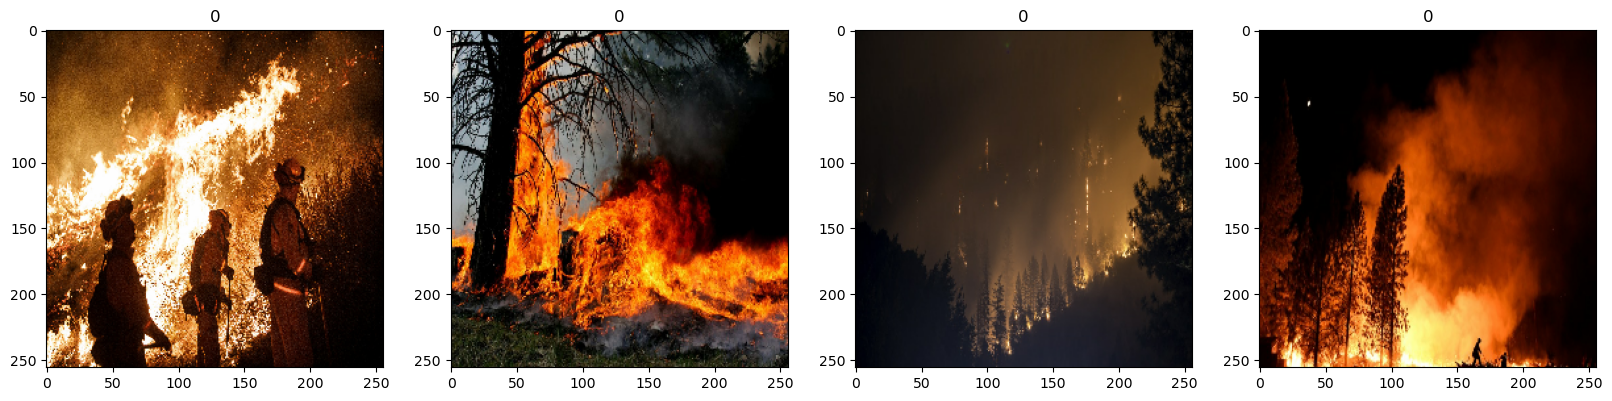

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

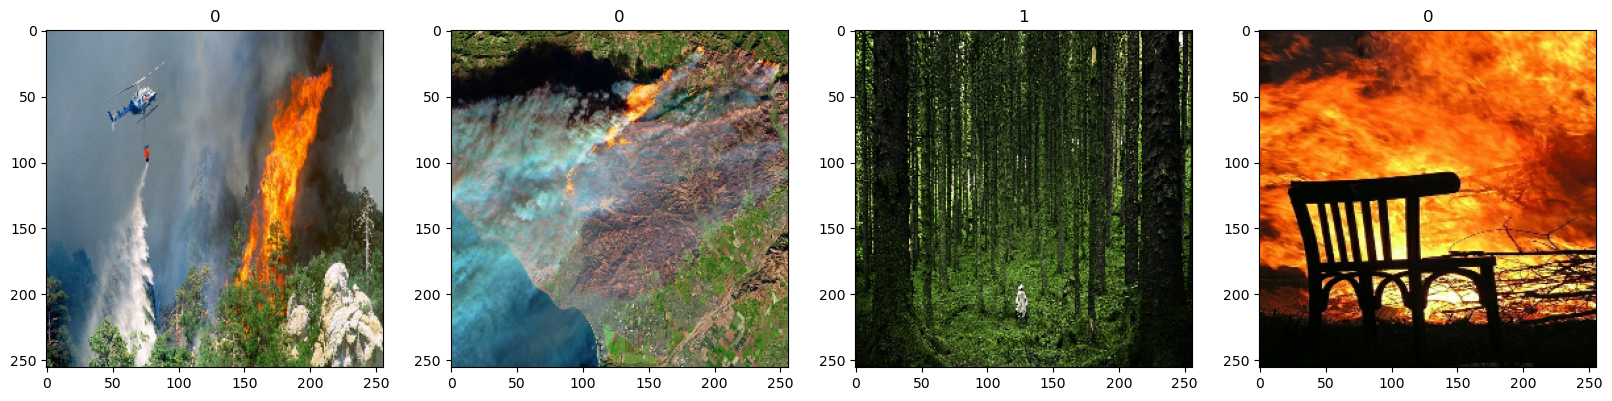

In [15]:
batch = data.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [16]:
print('Total number of batches: {}'.format(len(data)))

Total number of batches: 32


In [17]:
train_size = int(len(data)*.7) + 1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
print('train set: {} batches'.format(train_size))
print('val set: {} batches'.format(val_size))
print('test set: {} batches'.format(test_size))

train set: 23 batches
val set: 6 batches
test set: 3 batches


In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [26]:
logdir='train_logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 55s 2s/step - loss: 0.4275 - accuracy: 0.7962 - val_loss: 0.2720 - val_accuracy: 0.9167
Epoch 2/20
23/23 [==============================] - 53s 2s/step - loss: 0.2262 - accuracy: 0.9022 - val_loss: 0.2017 - val_accuracy: 0.9688
Epoch 3/20
23/23 [==============================] - 53s 2s/step - loss: 0.1142 - accuracy: 0.9511 - val_loss: 0.1365 - val_accuracy: 0.9479
Epoch 4/20
23/23 [==============================] - 58s 2s/step - loss: 0.1322 - accuracy: 0.9538 - val_loss: 0.1284 - val_accuracy: 0.9583
Epoch 5/20
23/23 [==============================] - 58s 2s/step - loss: 0.0821 - accuracy: 0.9715 - val_loss: 0.4109 - val_accuracy: 0.7812
Epoch 6/20
23/23 [==============================] - 58s 2s/step - loss: 0.1173 - accuracy: 0.9511 - val_loss: 0.0888 - val_accuracy: 0.9635
Epoch 7/20
23/23 [==============================] - 58s 2s/step - loss: 0.0732 - accuracy: 0.9742 - val_loss: 0.0667 - val_accuracy: 0.9792
Epoch 8/20
23/23 [==

# 8. Plot Performance

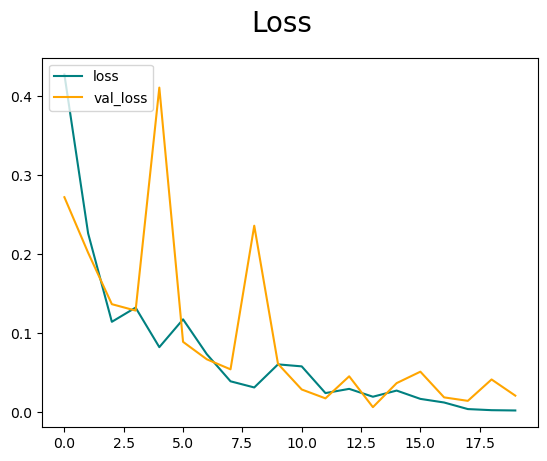

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

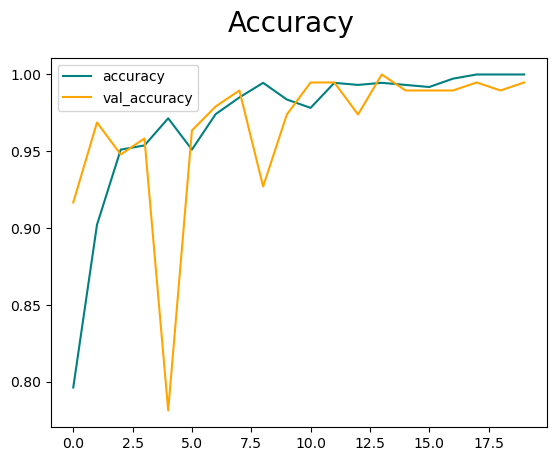

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 153ms/step


In [34]:
print('precision: {}'.format(pre.result()))
print('recall: {}'.format(re.result()))
print('accuracy: {}'.format(acc.result()))

precision: 1.0
recall: 1.0
accuracy: 1.0


# 10. Test

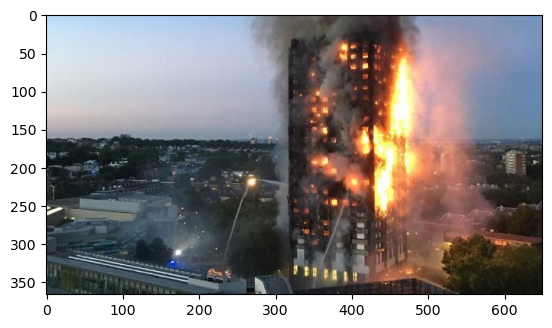

In [35]:
img = cv2.imread('/kaggle/input/fire-dataset/fire_dataset/fire_images/fire.175.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

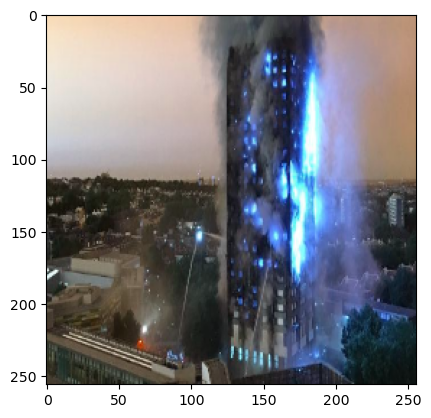

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [38]:
print(yhat)

[[0.09157336]]


In [39]:
if yhat > 0.5: 
    print(f'Predicted class is FIRE')
else:
    print(f'Predicted class is NON-FIRE')

Predicted class is NON-FIRE


# 11. Save the Model

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('models','fire_classifier.h5'))

In [42]:
new_model = load_model('models/fire_classifier.h5')

In [43]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 108ms/step


array([[0.09157336]], dtype=float32)